In [96]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [97]:
dfs = pd.read_excel("data/main_data.xlsx", sheet_name=None)
df = dfs['Data 2008 - 2022']

In [98]:
df.head()

,Year,Movie,US Distributor,US Gross ($M),WorldWide Gross ($M),Run Time (min),Critic Score (Rotten Tomatoes),Production Budget ($M),Unnamed: 8,Unnamed: 9
0,2008,Space Chimps,20th Century Fox,30.105968,67.029956,81,34,37.0,NaN,"Source: combined from IMDB.com, Boxofficemojo...."
1,2008,Shutter,20th Century Fox,25.92855,47.782426,83,7,8.0,NaN,NaN
2,2008,Horton Hears a Who,20th Century Fox,154.529439,299.477886,86,79,85.0,NaN,NaN
3,2008,Meet the Spartans,20th Century Fox,38.233676,84.646831,86,2,30.0,NaN,NaN
4,2008,Jumper,20th Century Fox,80.172128,222.640812,88,16,82.5,NaN,NaN


R^2: 0.0029592231664015145
Correlation: -0.05439874232371266


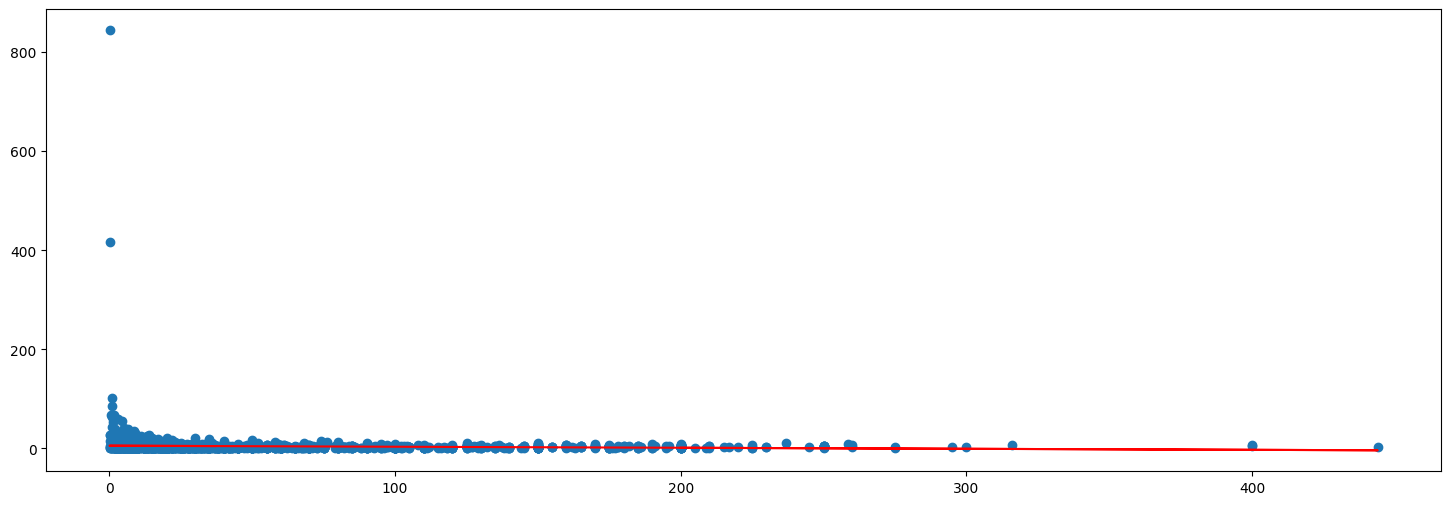

The centroids are [[ 28.78695572   4.77798466]
 [155.6          3.16691804]]
Cluster 1 correlation: -0.09346444943874958
Cluster 2 correlation: 0.21479945435805825


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/95/lnvd9m_n783bqb80f4lv31pc0000gn/T/ipykernel_28253/109751759.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[labels==i], return_rate[labels==i], c=corlors[i], label=clusters[i])


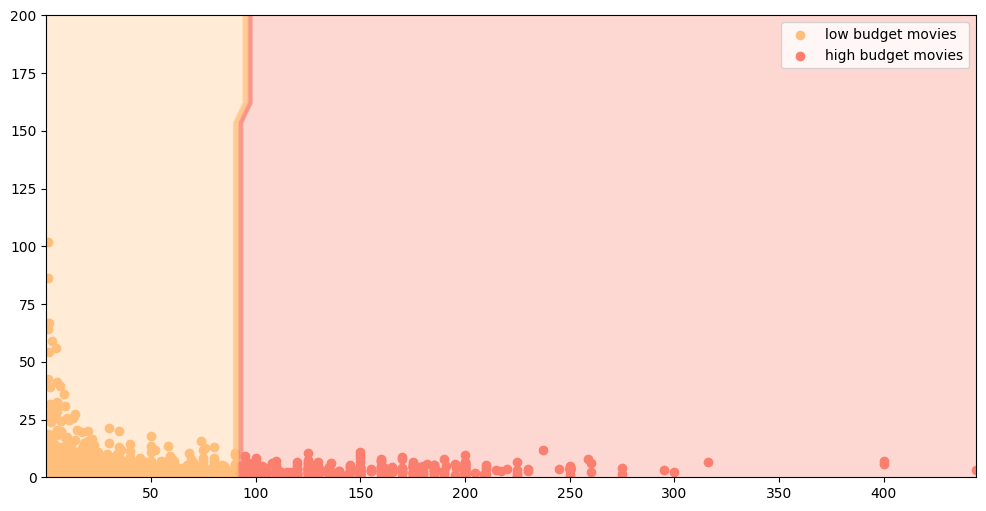

In [99]:
y = df["WorldWide Gross ($M)"]
x = df["Production Budget ($M)"]
return_rate = y/x

colors = [(142, 207, 201), (255,190,122),(250,127, 111), (130, 176, 210), (190, 184, 220), (231, 218, 210)]
for i in range(len(colors)):
    r, g, b = colors[i]
    colors[i] = (r/255, g/255, b/255)

#fit a line to the data
m, b = np.polyfit(x, return_rate, 1)
#calculat the R^2
y_pred = m*x+b
ss_res = np.sum((return_rate - y_pred)**2)
ss_tot = np.sum((return_rate - return_rate.mean())**2)
r2 = 1 - (ss_res/ss_tot)
print(f"R^2: {r2}")
#calculate the correlation
correlation = np.corrcoef(x, return_rate)
print(f"Correlation: {correlation[0,1]}")
plt.figure(figsize=(18, 6))
plt.scatter(x, return_rate)
plt.plot(x, m*x+b, c='r')
plt.show()



features = np.vstack([x, return_rate]).T
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(features)

labels = kmeans.labels_
cmap1 = create_custom_cmap(colors[1], colors[2])
corlors = [colors[1], colors[2], 'b']
clusters = ["low budget movies", "high budget movies"]
plt.figure(figsize=(12, 6))
for i in range(2):
    plt.scatter(x[labels==i], return_rate[labels==i], c=corlors[i], label=clusters[i])
#draw the contour of the Kmeans
x_min, x_max = x.min(), x.max()
y_min, y_max = return_rate.min(), return_rate.max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, alpha=0.5, cmap = cmap1)
#fill the contour
plt.contourf(xx, yy, Z, alpha=0.3, cmap = cmap1)
# calculate the kmeans centroids
centroids = kmeans.cluster_centers_
print("The centroids are",centroids)

plt.legend()

from matplotlib.colors import LinearSegmentedColormap
def create_custom_cmap(color1, color2):
    cmap_colors = [color1, color2]
    cmap_name = 'custom_cmap'
    return LinearSegmentedColormap.from_list(cmap_name, cmap_colors, N=2)




#perfrom linear regression on each cluster
# for i in range(2):
#     x_cluster = x[labels==i]
#     y_cluster = return_rate[labels==i]
#     m, b = np.polyfit(x_cluster, y_cluster, 1)
#     plt.plot(x_cluster, m*x_cluster+b, c=corlors[i])
#     #calculate the mean return rate for each cluster
#     print(f"Cluster {i+1} mean return rate: {y_cluster.mean()}")
#     #calculate the R^2 
#     y_pred = m*x_cluster+b
#     ss_res = np.sum((y_cluster - y_pred)**2)
#     ss_tot = np.sum((y_cluster - y_cluster.mean())**2)
#     r2 = 1 - (ss_res/ss_tot)
#     print(f"Cluster {i+1} R^2: {r2}")

#draw a border line of the Kmeans 




plt.ylim(0,200)
#calculate the correlation of each cluster
for i in range(2):
    x_cluster = x[labels==i]
    y_cluster = return_rate[labels==i]
    correlation = np.corrcoef(x_cluster, y_cluster)
    print(f"Cluster {i+1} correlation: {correlation[0,1]}")




The slope of the line is:  3.524980442652081
The y-intercept of the line is:  -17.008435721867436
The adjusted R^2 value is:  0.5890391983960686
The R^2 value is:  0.5892420418322009
The correlation coefficient is:  0.7676210274817911
The number of observations is:  2027
The p value is:  0.0
The standard error of the estimate is:  166.35138427967857
The degrees of freedom for the regression is:  1
The degrees of freedom for the residual is:  2025
The degrees of freedom for the total is:  2026
The sum of squares in the regression is:  80386960.00974335
The sum of squares in the residual is:  56037385.67982471
The sum of squares in the total is:  136424345.68956745
The mean square in the regression is:  80386960.00974335
The mean square in the residual is:  27672.783051765287
The F value is:  1.434523738652652
The intercept standard error is:  4.980299639032206
The slope standard error is:  0.06540189443470472
The t value for the intercept is:  -3.4151430545597834
The t value for the slo

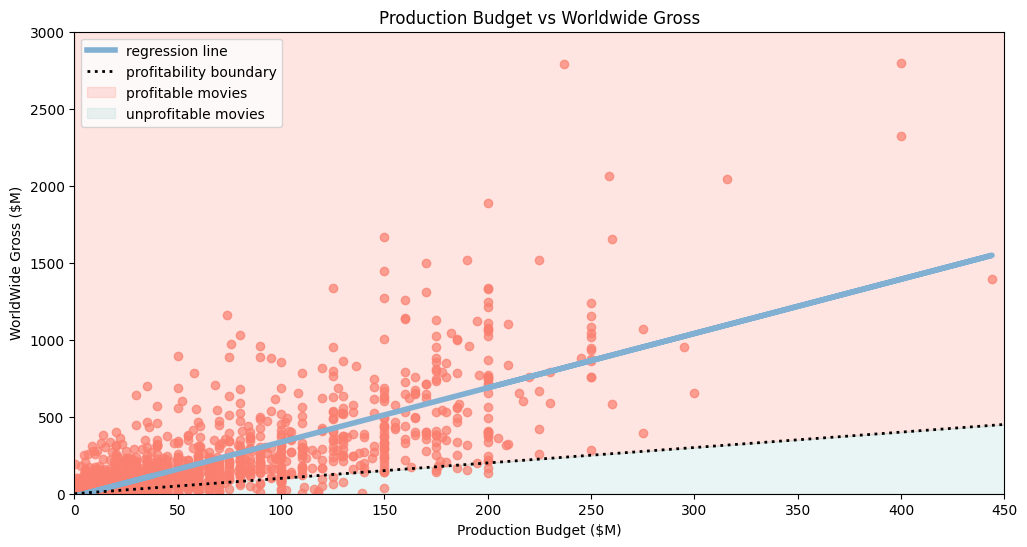

In [100]:
y = df["WorldWide Gross ($M)"]
x = df["Production Budget ($M)"]   

colors = [(142, 207, 201), (255,190,122),(250,127, 111), (130, 176, 210), (190, 184, 220), (231, 218, 210)]
for i in range(len(colors)):
    r, g, b = colors[i]
    colors[i] = (r/255, g/255, b/255)


plt.figure(figsize=(12, 6))
plt.plot(x, y, 'o',alpha = 0.7, color=colors[2])

#perform a linear regression
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b, color=colors[3], lw = 4, label = "regression line")
plt.title("Production Budget vs Worldwide Gross")
plt.xlabel("Production Budget ($M)")
plt.ylabel("WorldWide Gross ($M)")

print("The slope of the line is: ", m)
print("The y-intercept of the line is: ", b)

#R^2 
y_mean = np.mean(y)
ss_tot = np.sum((y - y_mean)**2)
ss_res = np.sum((y - (m*x + b))**2)
r_squared = 1 - (ss_res/ss_tot)
#adjusted R^2
n = len(x)
k = 1
adj_r_squared = 1 - (1 - r_squared)*(n - 1)/(n - k - 1)
print("The adjusted R^2 value is: ", adj_r_squared)
print("The R^2 value is: ", r_squared)

#correlation coefficient
correlation = np.corrcoef(x, y)
print("The correlation coefficient is: ", correlation[0,1])
#obervasions 
n = len(x)
print("The number of observations is: ", n)
#print the p value
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("The p value is: ", p_value)


#calculate the standard error of the estimate
std_err = np.sqrt(ss_res/(n-2))
print("The standard error of the estimate is: ", std_err)

#print each df , regression , residual total 
print("The degrees of freedom for the regression is: ", 1)
print("The degrees of freedom for the residual is: ", n-2)
print("The degrees of freedom for the total is: ", n-1)

#calculate sum of squares in the regression
ss_reg = np.sum((m*x + b - y_mean)**2)
print("The sum of squares in the regression is: ", ss_reg)
#of squares in the residual
print("The sum of squares in the residual is: ", ss_res)
#of squares in the total
print("The sum of squares in the total is: ", ss_tot)

#mean square in the regression
ms_reg = ss_reg/1
print("The mean square in the regression is: ", ms_reg)
#mean square in the residual
ms_res = ss_res/(n-2)
print("The mean square in the residual is: ", ms_res)


#F value



# F value 
f_value = r_squared/(1-r_squared)
print("The F value is: ", f_value)

#calculate the intercept std error
x_mean = np.mean(x)
x_var = np.sum((x - x_mean)**2)
intercept_std_err = std_err*np.sqrt(1/n + x_mean**2/x_var)
print("The intercept standard error is: ", intercept_std_err)

#calculate the slope std error
slope_std_err = std_err/np.sqrt(x_var)
print("The slope standard error is: ", slope_std_err)

#calculate the t value for the intercept and slope
t_intercept = b/intercept_std_err
t_slope = m/slope_std_err
print("The t value for the intercept is: ", t_intercept)
print("The t value for the slope is: ", t_slope)

#calculate the p value for the intercept and slope
p_intercept = 2*(1 - stats.t.cdf(t_intercept, n-2))
p_slope = 2*(1 - stats.t.cdf(t_slope, n-2))
print("The p value for the intercept is: ", p_intercept)
print("The p value for the slope is: ", p_slope)
#calculate the p value for the intercept in another way
p_intercept = 2*(1 - stats.t.cdf(np.abs(t_intercept), n-2))
print("The p value for the intercept is: ", p_intercept)






new_x = np.linspace(0, 450, 100)
#plot an y = x line 
plt.plot(new_x, new_x, color="black", lw = 2, label = "profitability boundary",linestyle = "dotted")

#fill below the line and x
fill1 =plt.fill_between(new_x, new_x, 3000, color=colors[2], alpha = 0.2, label = "profitable movies")
fill2 =plt.fill_between(new_x, new_x, 0, color=colors[0], alpha = 0.2, label = "unprofitable movies")
plt.xlim(0, 450)
plt.ylim(0, 3000)
plt.legend()
plt.show()



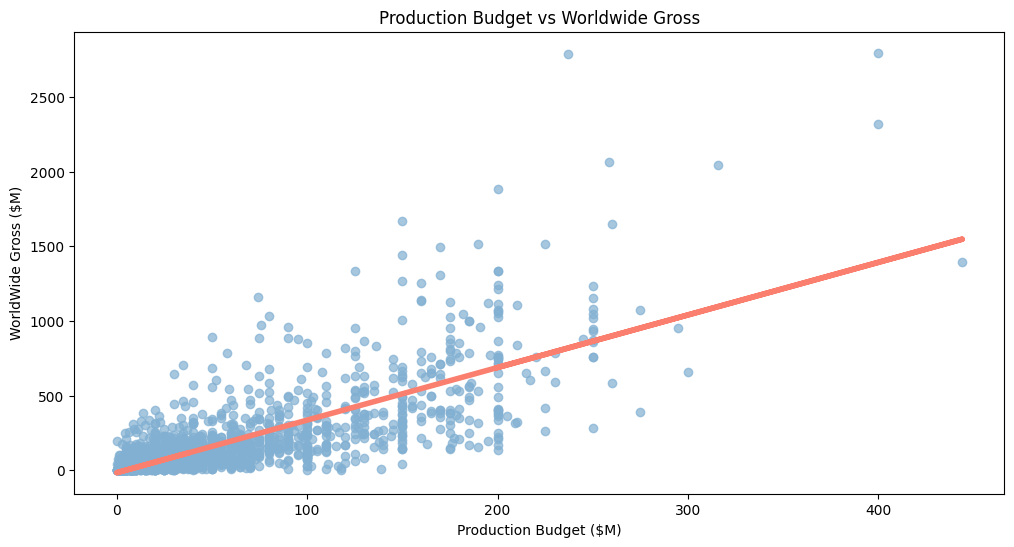

The slope of the line is:  3.524980442652081
The y-intercept of the line is:  -17.008435721867436
The adjusted R^2 value is:  0.5890391983960686
The R^2 value is:  0.5892420418322009
The correlation coefficient is:  0.7676210274817911


In [101]:
y = df["WorldWide Gross ($M)"]
x = df["Production Budget ($M)"]   

colors = [(142, 207, 201), (255,190,122),(250,127, 111), (130, 176, 210), (190, 184, 220), (231, 218, 210)]
for i in range(len(colors)):
    r, g, b = colors[i]
    colors[i] = (r/255, g/255, b/255)


plt.figure(figsize=(12, 6))
plt.plot(x, y, 'o',alpha = 0.7, color=colors[3])

#perform a linear regression
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b, color=colors[2], lw = 4)
plt.title("Production Budget vs Worldwide Gross")
plt.xlabel("Production Budget ($M)")
plt.ylabel("WorldWide Gross ($M)")
plt.show()
print("The slope of the line is: ", m)
print("The y-intercept of the line is: ", b)

#R^2 
y_mean = np.mean(y)
ss_tot = np.sum((y - y_mean)**2)
ss_res = np.sum((y - (m*x + b))**2)
r_squared = 1 - (ss_res/ss_tot)
#adjusted R^2
n = len(x)
k = 1
adj_r_squared = 1 - (1 - r_squared)*(n - 1)/(n - k - 1)
print("The adjusted R^2 value is: ", adj_r_squared)
print("The R^2 value is: ", r_squared)

#correlation coefficient
correlation = np.corrcoef(x, y)
print("The correlation coefficient is: ", correlation[0,1])



In [102]:
#set a threshold for the production budget 
#we will only consider movies with a production budget of 100 million or less

def thresholdfitk(k):
    x = df["Production Budget ($M)"]
    y = df["WorldWide Gross ($M)"]
    #y is the return rate
    y = y/x
    mask = x >= k
    x = x[mask]
    y = y[mask]
    m, b = np.polyfit(x, y, 1)
    y_mean = np.mean(y)
    ss_tot = np.sum((y - y_mean)**2)
    ss_res = np.sum((y - (m*x + b))**2)
    r_squared = 1 - (ss_res/ss_tot)
    return r_squared


r_squared_values = []
for k in range(0, 200, 5):
    r_squared_values.append(thresholdfitk(k))
print(max(r_squared_values))


def thresholdfit(m, n):
    x = df["Production Budget ($M)"]
    y = df["WorldWide Gross ($M)"]
    #y is the return rate
    y = y/x
    mask = (x > m) & (x <= n)
    x = x[mask]
    y = y[mask]
    if len(x) == 0:
        return 0
    m, b = np.polyfit(x, y, 1)
    y_mean = np.mean(y)
    ss_tot = np.sum((y - y_mean)**2)
    ss_res = np.sum((y - (m*x + b))**2)
    r_squared = 1 - (ss_res/ss_tot)
    return r_squared
r_squared_values = []
for m in range(0, 200, 5):
    new = []
    for n in range(m+5, 200, 5):
        new.append(thresholdfit(m, n))
    r_squared_values.append(new)


#visualize the heat map
import seaborn as sns 
#find the max pair of m and n

print(r_squared_values)



0.052602176415632806
[[0.0478677751958706, 0.031829634538569684, 0.0241020341622048, 0.02150696384246631, 0.02022671221938732, 0.01864382068099968, 0.017275898289804692, 0.015800211661599173, 0.015473831827555795, 0.014032367624974063, 0.01344165030216582, 0.01265665656506254, 0.012189114078599239, 0.011535235621886963, 0.010645971039344393, 0.009721656624965713, 0.009301286452009006, 0.008758330567214312, 0.008486788625215014, 0.008101457022995473, 0.007912239101676044, 0.007625093141264805, 0.007614987584633193, 0.0074706666170256675, 0.006890912040272812, 0.006550089239108603, 0.006465771018509203, 0.006417919124767857, 0.006262232329417361, 0.005680358709144406, 0.005623712566645955, 0.005310256788725098, 0.005158401959684533, 0.004912882680121133, 0.004636406446352881, 0.004572580648372959, 0.004437988713426266, 0.004377229529091697, 0.004319744728785269], [0.0004249752854401656, 0.0018758577637343343, 0.017757030404760066, 0.024100333133138196, 0.027464672862016037, 0.02734092236

/var/folders/95/lnvd9m_n783bqb80f4lv31pc0000gn/T/ipykernel_28253/571352547.py:36: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x, y, 1)
/var/folders/95/lnvd9m_n783bqb80f4lv31pc0000gn/T/ipykernel_28253/571352547.py:36: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x, y, 1)
/var/folders/95/lnvd9m_n783bqb80f4lv31pc0000gn/T/ipykernel_28253/571352547.py:36: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x, y, 1)
/var/folders/95/lnvd9m_n783bqb80f4lv31pc0000gn/T/ipykernel_28253/571352547.py:36: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x, y, 1)
/var/folders/95/lnvd9m_n783bqb80f4lv31pc0000gn/T/ipykernel_28253/571352547.py:36: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x, y, 1)
/var/folders/95/lnvd9m_n783bqb80f4lv31pc0000gn/T/ipykernel_28253/571352547.py:36: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x, y, 1)


In [103]:
def threshold2(k):
    x = df["Production Budget ($M)"]
    y = df["WorldWide Gross ($M)"]
    y = y-x
    mask = x >= k
    x = x[mask]
    y = y[mask]
    if len(x) == 0:
        return 0
    m, b = np.polyfit(x, y, 1)
    y_mean = np.mean(y)
    ss_tot = np.sum((y - y_mean)**2)
    ss_res = np.sum((y - (m*x + b))**2)
    r_squared = 1 - (ss_res/ss_tot)
    return r_squared

In [104]:
colors = [(142, 207, 201), (255,190,122),(250,127, 111), (130, 176, 210), (190, 184, 220), (231, 218, 210)]
for i in range(len(colors)):
    r, g, b = colors[i]
    colors[i] = (r/255, g/255, b/255)

Text(0.5, 0.98, 'The budget distribution of profitable and unprofitable movies')

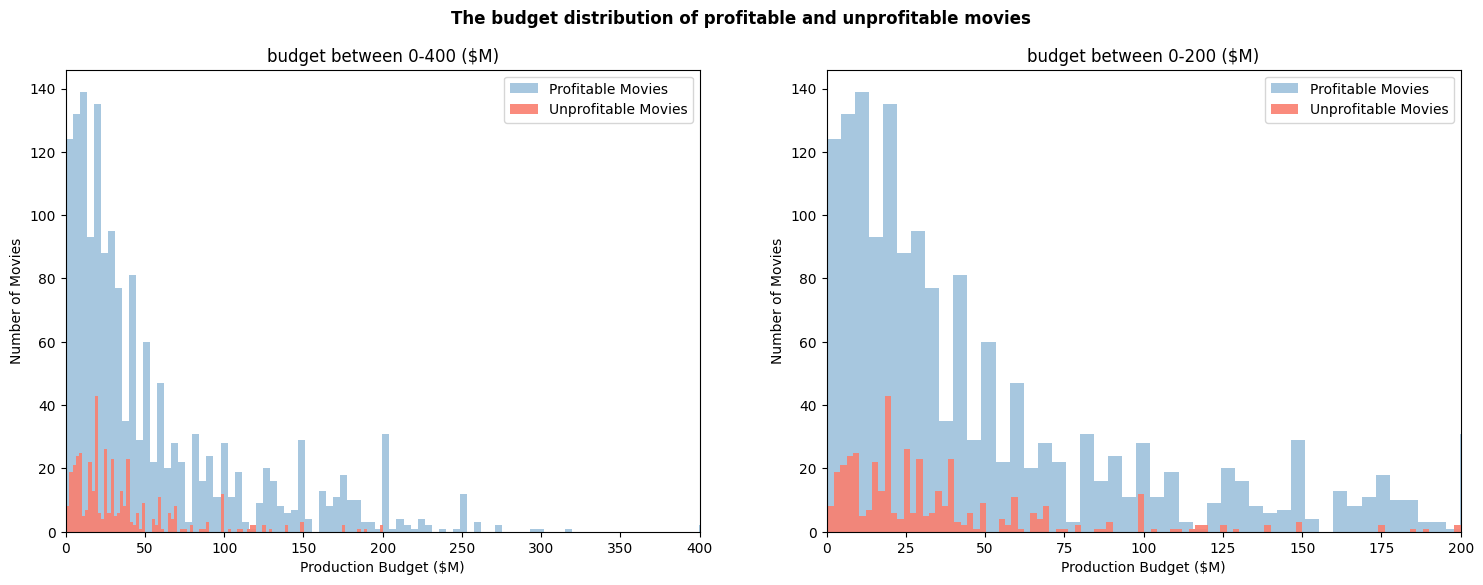

In [105]:
y = df["WorldWide Gross ($M)"]
x = df["Production Budget ($M)"]
profit = y-x
y = profit > 0 
#plot a histogram of the profit
#set the color to be different for profitable and unprofitable movies
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].set_title("budget between 0-400 ($M)")
axs[0].hist(x[y], bins=100, alpha=0.7,label="Profitable Movies", color=colors[3])
axs[0].hist(x[~y], bins=100, alpha=0.9, label="Unprofitable Movies", color=colors[2])
axs[0].set_xlabel("Production Budget ($M)")
axs[0].set_ylabel("Number of Movies")
axs[0].set_xlim(0, 400)



axs[0].legend()

#when we only see the budget < 200
x = df["Production Budget ($M)"]
y = df["WorldWide Gross ($M)"]
y = profit > 0
profitable = x[y]
unprofitable = x[~y]

axs[1].set_title("budget between 0-200 ($M)")
axs[1].hist(profitable, bins=100, alpha=0.7,label="Profitable Movies", color=colors[3])
axs[1].hist(unprofitable, bins=100, alpha=0.9, label="Unprofitable Movies", color=colors[2])
axs[1].set_xlabel("Production Budget ($M)")
axs[1].set_ylabel("Number of Movies")
axs[1].set_xlim(0, 200) 
axs[1].legend()

fig.suptitle("The budget distribution of profitable and unprofitable movies", fontweight="bold")    





In [106]:
profitable_budget = x[y]
unprofitable_budget = x[~y]

print("The average production budget for profitable movies is: ", np.mean(profitable_budget))
print("The average production budget for unprofitable movies is: ", np.mean(unprofitable_budget))

print("general possibility of a movie being profitable: ", np.mean(y))  



The average production budget for profitable movies is:  55.05960061728394
The average production budget for unprofitable movies is:  35.13525798525799
general possibility of a movie being profitable:  0.7992106561420819


In [107]:
profitable_budget = x[y]
print("The average production budget for profitable movies is: ", profitable_budget)

The average production budget for profitable movies is:  0        37.0
1         8.0
2        85.0
3        30.0
4        82.5
        ...  
2022    295.0
2023     85.0
2024    200.0
2025    200.0
2026    200.0
Name: Production Budget ($M), Length: 1620, dtype: float64


(1581,)
(407,)
the value of a and b are:  [ 0.26080682 -0.36367112]
the error of a and b are:  [0.00487637 0.02167008]
R^2:  0.9834967604396906
Adjusted R^2:  0.982794494926486
The p value is:  6.108301233096064e-17
The t value is:  53.483826620575385
[ 0.26080682 -0.36367112]


/var/folders/95/lnvd9m_n783bqb80f4lv31pc0000gn/T/ipykernel_28253/2452565011.py:21: RuntimeWarning: invalid value encountered in divide
  pdf = hist_profitable[0]/total_movies


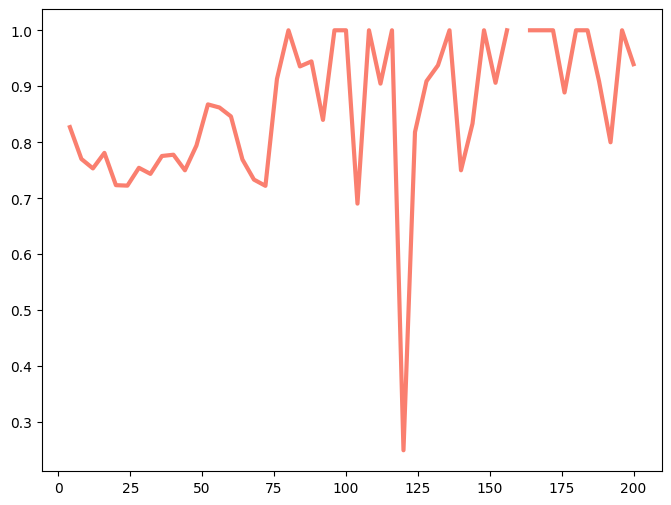

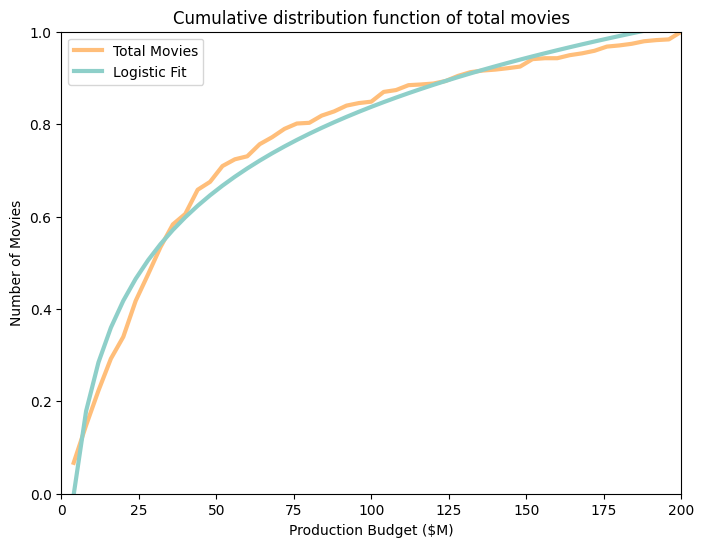

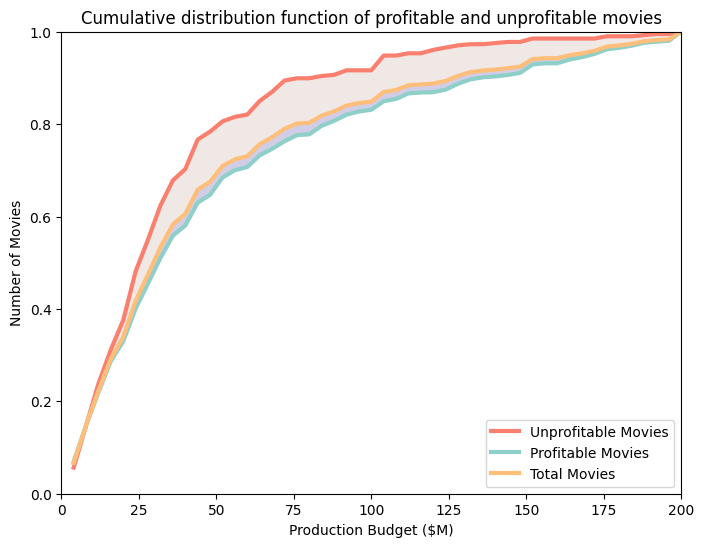

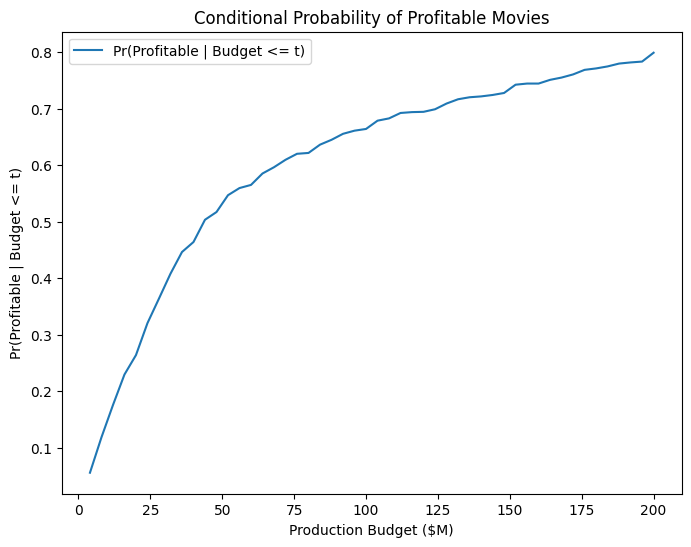

In [128]:
#calculate the histogram of profitable movies' budget 
profitable_budget_only_200 = profitable_budget[profitable_budget <= 200]
print(profitable_budget_only_200.shape)
print(unprofitable_budget.shape)

hist_non_profitable = np.histogram(unprofitable_budget, bins=50, range=(0, 200))
hist_profitable = np.histogram(profitable_budget_only_200, bins=50, range=(0, 200))


for_cdf_non = hist_non_profitable[0]/np.sum(hist_non_profitable[0])
for_cdf = hist_profitable[0]/np.sum(hist_profitable[0])
#calculate the cdf of the profitable and unprofitable movies    
cdf_non_profitable = np.cumsum(for_cdf_non)
cdf_profitable = np.cumsum(for_cdf)

total_movies = hist_non_profitable[0] + hist_profitable[0]



# divide by the total number of movies at each budget level, return 0 if zero division
pdf = hist_profitable[0]/total_movies

plt.figure(figsize=(8, 6))
plt.plot(hist_non_profitable[1][1:], pdf, label="Pr(Profitable | Budget = t)", color = colors[2], lw = 3)





cdf_total = np.cumsum(total_movies)
cdf_total = cdf_total/cdf_total.max()
#plot the cdf_total separately

plt.figure(figsize=(8, 6))

plt.plot(hist_non_profitable[1][1:], cdf_total, label="Total Movies", color = colors[1], lw = 3)
#fit the cdf_total with a logistic function
from scipy.optimize import curve_fit    
def logistic(x, a, b):
    return a*np.log(x) + b

popt, pcov = curve_fit(logistic, hist_non_profitable[1][1:], cdf_total)
#print a, b , and error
print("the value of a and b are: ", popt)
print("the error of a and b are: ", np.sqrt(np.diag(pcov)))
#print R^2 and adjusted R^2
y_pred = logistic(hist_non_profitable[1][1:], *popt)
ss_res = np.sum((cdf_total - y_pred)**2)
ss_tot = np.sum((cdf_total - cdf_total.mean())**2)
r_squared = 1 - (ss_res/ss_tot)
n = len(hist_non_profitable[1][1:])
k = 2
adj_r_squared = 1 - (1 - r_squared)*(n - 1)/(n - k - 1)
print("R^2: ", r_squared)
print("Adjusted R^2: ", adj_r_squared)
#print the p value
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(hist_non_profitable[1][1:], cdf_total)
print("The p value is: ", p_value)
#print the t value
t_value = popt[0]/np.sqrt(np.diag(pcov)[0])
print("The t value is: ", t_value)

plt.plot(hist_non_profitable[1][1:], logistic(hist_non_profitable[1][1:], *popt), label="Logistic Fit", color = colors[0], lw = 3)
plt.title("Cumulative distribution function of total movies")
plt.xlabel("Production Budget ($M)")
plt.ylabel("Number of Movies")
plt.xlim(0, 200)
plt.ylim(0, 1)
plt.legend()
print(popt)



plt.figure(figsize=(8, 6))
plt.plot(hist_non_profitable[1][1:], cdf_non_profitable, label="Unprofitable Movies", color = colors[2], lw = 3)
plt.fill_between(hist_non_profitable[1][1:], cdf_total,cdf_non_profitable, color = colors[5], alpha = 0.6)
plt.plot(hist_profitable[1][1:], cdf_profitable, label="Profitable Movies", color = colors[0], lw = 3)
plt.fill_between(hist_profitable[1][1:], cdf_profitable,cdf_total, color = colors[4], alpha = 0.7)
plt.plot(hist_non_profitable[1][1:], cdf_total, label="Total Movies", color = colors[1], lw = 3)

plt.title("Cumulative distribution function of profitable and unprofitable movies")
plt.xlabel("Production Budget ($M)")
plt.ylabel("Number of Movies")
plt.xlim(0, 200)
plt.ylim(0, 1)
plt.legend()



#Pr(profitable | budget <= t) = Pr(profitable and budget <= t) / Pr(budget <= t)
#calculate cdf of profitable movies
profitable = hist_profitable[0]
#calculate cdf of all movies
total = total_movies[0]
#calculate cumulative total 
cdf_total = np.cumsum(total)
#calculate culmulative profitable
cdf_profitable = np.cumsum(profitable)
#calculate the conditional probability of profitable movies
cdf = cdf_profitable/cdf_total
#plot the conditional probability of profitable movies
cdf = cdf/cdf.max() * np.mean(y)



plt.figure(figsize=(8, 6))
plt.plot(hist_non_profitable[1][1:], cdf, label="Pr(Profitable | Budget <= t)")
plt.title("Conditional Probability of Profitable Movies")
plt.xlabel("Production Budget ($M)")
plt.ylabel("Pr(Profitable | Budget <= t)")
plt.legend()




[0.05560605 0.11828924 0.17541183 0.22950135 0.263876   0.32049308
 0.3639669  0.40794624 0.44636496 0.4640578  0.50348755 0.51713631
 0.54696137 0.55959911 0.56515972 0.5853801  0.59650131 0.60964456
 0.62026026 0.62177679 0.63643657 0.64503023 0.65564593 0.66120654
 0.6642396  0.67889937 0.68294345 0.69254813 0.69406466 0.69457017
 0.69911976 0.70922995 0.71681259 0.72035116 0.72186769 0.72439524
 0.7279338  0.74259358 0.74461562 0.74461562 0.75118725 0.75523132
 0.76079193 0.76888008 0.77140763 0.7749462  0.78000129 0.78202333
 0.78353986 0.79921066]
The value of a is:  0.20858350442925067
The value of b is:  -0.30344319988817453
The error of a is:  0.0033423014412357287
The error of b is:  0.014852842480858837
The R^2 value is:  0.9878254544845367
The adjusted R^2 value is:  0.9873073887179212
The degrees of freedom for the regression is:  2
The degrees of freedom for the residual is:  47
The F value is:  81.13858979210923
The p value is:  5.551115123125783e-16


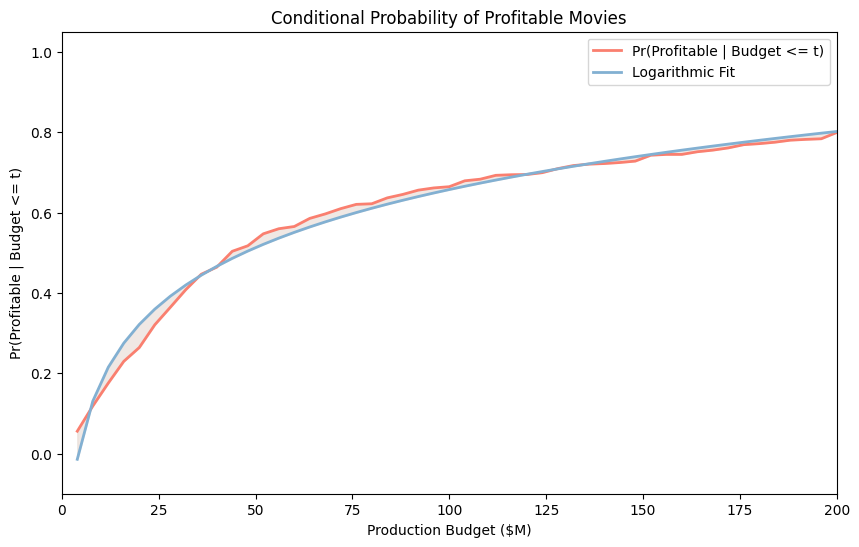

In [127]:
# then try to fit a funtion 

def logf(x, a, b):
    return a*np.log(x) + b
print(cdf)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(logf, hist_non_profitable[1][1:], cdf)
a, b = popt
print("The value of a is: ", a)
print("The value of b is: ", b)
#calculate fitting error
fit_error = np.sqrt(np.diag(pcov))
print("The error of a is: ", fit_error[0])
print("The error of b is: ", fit_error[1])
#r^2 
residuals = cdf - logf(hist_non_profitable[1][1:], a, b)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cdf - np.mean(cdf))**2)
r_squared = 1 - (ss_res/ss_tot)
print("The R^2 value is: ", r_squared)
#adjust the R^2 value
n = len(hist_non_profitable[1][1:])
k = 2
adj_r_squared = 1 - (1 - r_squared)*(n - 1)/(n - k - 1)
print("The adjusted R^2 value is: ", adj_r_squared)
#the degrees of freedom
print("The degrees of freedom for the regression is: ", k)
print("The degrees of freedom for the residual is: ", n-k-1)
#calculate the F value
f_value = r_squared/(1-r_squared)
print("The F value is: ", f_value)
#calculate the p value
p_value = 1 - stats.f.cdf(f_value, k, n-k-1)
print("The p value is: ", p_value)
#plot the conditional probability of profitable movies
cdf = cdf/cdf.max() * np.mean(y)
#print observation 
n = len(hist_non_profitable[1][1:])
print("The number of observations is: ", n)
#print the p value of a and b 





plt.figure(figsize=(10, 6))
plt.plot(hist_non_profitable[1][1:], cdf, color = colors[2],label="Pr(Profitable | Budget <= t)",lw =2)
plt.plot(hist_non_profitable[1][1:], logf(hist_non_profitable[1][1:], a, b), color =colors[3],label="Logarithmic Fit", lw = 2)
plt.fill_between(hist_non_profitable[1][1:], cdf, logf(hist_non_profitable[1][1:], a, b), color = colors[5], alpha = 0.6)
plt.title("Conditional Probability of Profitable Movies")
plt.xlabel("Production Budget ($M)")
plt.ylabel("Pr(Profitable | Budget <= t)")
plt.xlim(0, 200)
plt.ylim(-0.1, 1.05)
plt.legend()
plt.show()



#also plot the Pr(budget <= t)




[30.04744942]
[0.00375189]
[4.09343503]
min [4.09343503]
[-1.57903262e-06]


/var/folders/95/lnvd9m_n783bqb80f4lv31pc0000gn/T/ipykernel_28253/1377996300.py:8: RuntimeWarning: divide by zero encountered in divide
  return a2/x * (a1*np.log(x) + b1)**2 + a1*(a1*np.log(x) + b1) *(a2*np.log(x) + b2)/x
/var/folders/95/lnvd9m_n783bqb80f4lv31pc0000gn/T/ipykernel_28253/1377996300.py:8: RuntimeWarning: divide by zero encountered in log
  return a2/x * (a1*np.log(x) + b1)**2 + a1*(a1*np.log(x) + b1) *(a2*np.log(x) + b2)/x


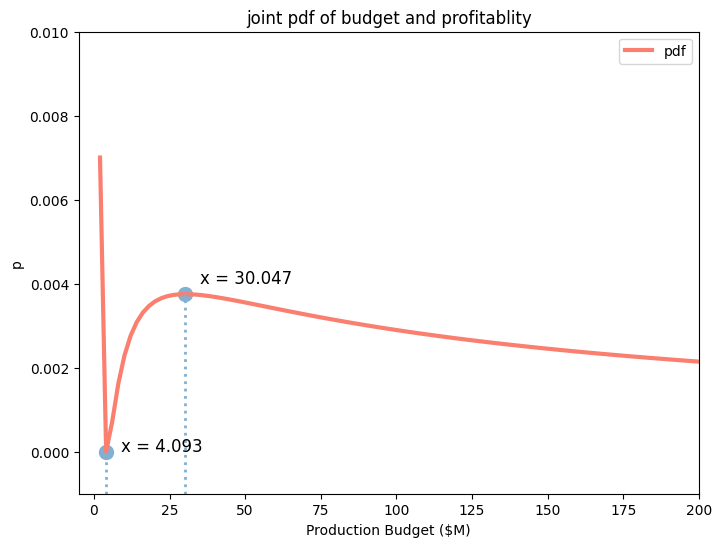

In [137]:
a2 = 0.20858350442925067
b2 = -0.30344319988817453
a1 = 0.26080682 
b1 = -0.36367112


def f(x, a1, b1, a2, b2):
    return a2/x * (a1*np.log(x) + b1)**2 + a1*(a1*np.log(x) + b1) *(a2*np.log(x) + b2)/x 

#plot the function 
x = np.linspace(0, 200, 100)
plt.figure(figsize=(8, 6))

plt.plot(x, f(x, a1, b1, a2, b2), color = colors[2], lw = 3, label="pdf")
plt.title("joint pdf of budget and profitablity")
plt.xlabel("Production Budget ($M)")
plt.ylabel("p")
plt.xlim(-5, 200)
plt.ylim(-0.001, 0.01)
plt.legend()


#find the maximum of the function
from scipy.optimize import minimize
res = minimize(lambda x: -f(x, a1, b1, a2, b2), 50)
print(res.x)
print(f(res.x, a1, b1, a2, b2))
plt.vlines(res.x, -0.001, f(res.x, a1, b1, a2, b2), color = colors[3], lw = 2, linestyles="dotted")
#show the intersection of the vertical line and the function
plt.scatter(res.x, f(res.x, a1, b1, a2, b2), color = colors[3], s = 100)
#and the numerical value of the maximum
plt.text(res.x+ 5, 0.004, "x = 30.047", fontsize=12)

#find the minimum of the function around 0-25
res = minimize(lambda x: f(x, a1, b1, a2, b2), 25)
print(res.x)
print("min",res.x)
print(f(res.x, a1, b1, a2, b2))
plt.vlines(res.x, -0.001, f(res.x, a1, b1, a2, b2), color = colors[3], lw = 2, linestyles="dotted")
#show the intersection of the vertical line and the function
plt.scatter(res.x, f(res.x, a1, b1, a2, b2), color = colors[3], s = 100)
#and the numerical value of the maximum 
plt.text(res.x+ 5, 0, "x = 4.093", fontsize=12)
plt.show()


